### 📘 Overview of This Notebook

- Load the GLOF database and focus on the **High Mountain Asia** subset.
- Filter for **Bhutan-specific GLOF events**, identifying **19 events** occurring between **1954 and 2019**.
- Standardize and consolidate event timing using the `Date`, `Date_Min`, and `Date_Max` fields to create a unified `Event_Date`.
- Visualize the **Bhutan GLOF events on a map**, with each event's **year annotated** near its location.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Timestamp

import geopandas as gpd
from shapely.geometry import Point

In [2]:
# Load the specific sheet "High Mountain Asia" from the GLOF database
file_path = '../data/glofdatabase_v4-1.ods'
df_hma = pd.read_excel(file_path, engine='odf', sheet_name='High Mountain Asia')

# Quick inspection
print("DataFrame shape:", df_hma.shape)
print("Column names:", df_hma.columns)
df_hma.head()

DataFrame shape: (638, 57)
Column names: Index(['ID', 'Major_RGI_Region', 'Mountain_range_Region', 'Country', 'Glacier',
       'RGI_Glacier_Id', 'RGI_Glacier_Area', 'Lake', 'Lake_type', 'Longitude',
       'Latitude', 'River', 'Date', 'Date_Min', 'Date_Max', 'Mechanism',
       'Mean_Lake_Volume_VL', 'Min_VL', 'Max_VL', 'VL_calculation',
       'Mean_Flood_Volume_V0', 'Min_V0', 'Max_V0', 'V0_calculation',
       'Peak_discharge_Qp', 'Min_Qp', 'Max_Qp', 'Qp_calculation',
       'Impact_and_destruction', 'reported_impacts', 'economic_losses',
       'D_buildings', 'D_bridges', 'D_roads_paths', 'D_railroads',
       'D_utilities', 'D_flood_protection', 'D_environmental', 'resettlement',
       'reported_fatalities', 'Further_comments', 'First_reference_found',
       'Reference', 'Reference_comments', 'Lake_area_before',
       'Perimeter_before', 'Image_date_before', 'Satellite_before',
       'Scenename_before', 'Certainty_level_before', 'Lake_area_after',
       'Perimeter_after', 'Im

,ID,Major_RGI_Region,Mountain_range_Region,Country,Glacier,RGI_Glacier_Id,RGI_Glacier_Area,Lake,Lake_type,Longitude,...,Satellite_before,Scenename_before,Certainty_level_before,Lake_area_after,Perimeter_after,Image_date_after,Satellite_after,Scenename_after,Certainty_level_after,Lake_area_comments
0,running number (regionally),RGI region in which the GLOF occurred,Major mountain unit/range in which the GLOF wa...,Source location of the GLOF,Name of the glacier that feeds the burst glaci...,Glacier Id derived from RGI polygon,Glacier area derived from RGI polygon,Name of the outburst source lake,Material of the impounding dam,X coordinate,...,Satellite from which the image was derived,Scenename,"1 – unsure (clouds, shadows,…)",lake area after outburst,Lake perimeter before outburst,Date of satellite image used for mapping,Satellite from which the image was derived,Scenename,"1 – unsure (clouds, shadows,...)",Mapping notes and comments
1,NaN,NaN,e.g. Karakoram,e.g. Pakistan,e.g. Baltoro Glacier,NaN,km2,e.g. Baltoro Lake 1,"e.g ice, moraine, water pocket, bedrock, combined",XX.XX°,...,NaN,NaN,2 – sure,m²,m,YYYY-MM_DD,NaN,NaN,2 – sure,NaN
2,1,"Asia, South West",Karakoram,India,Kumdan,RGI60-14.09679,44.561,NaN,ice,77.704625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,"Asia, South West",Karakoram,Pakistan,Biafo,RGI60-14.00005,559.807,NaN,ice,75.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,"Asia, South West",Karakoram,India,Kumdan,RGI60-14.09679,44.561,NaN,ice,77.704625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check which countries this contains

In [3]:
df_hma['Country'].value_counts()

Country
Kyrgyzstan                     179
Pakistan                       163
China                          108
Kazakhstan                      73
India                           46
Nepal                           25
Bhutan                          19
Tajikistan                      17
Afghanistan                      3
Source location of the GLOF      1
e.g. Pakistan                    1
Myanmar (Burma)                  1
Mongolia                         1
Name: count, dtype: int64

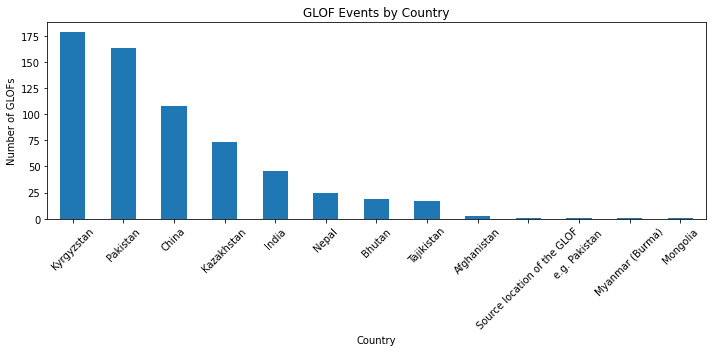

In [4]:
df_hma['Country'].value_counts().plot(kind='bar', figsize=(10, 5), title='GLOF Events by Country')
plt.xlabel('Country')
plt.ylabel('Number of GLOFs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Next we include only GLOF events from Bhutan

In [5]:
df_bhutan = df_hma[df_hma['Country'].str.strip().str.lower() == 'bhutan']
print(f"Number of GLOF events in Bhutan: {len(df_bhutan)}")

# Select only the following columns that seem useful
selected_columns = [
    'Major_RGI_Region', 'Mountain_range_Region', 
    'Glacier', 'RGI_Glacier_Id', 'RGI_Glacier_Area', 'Lake',
    'Lake_type', 'Longitude', 'Latitude', 'River', 'Date',
    'Date_Min', 'Date_Max', 'Mechanism', 'Mean_Lake_Volume_VL'
]

# Show the subset of the Bhutan data
df_bhutan[selected_columns]

Number of GLOF events in Bhutan: 19


,Major_RGI_Region,Mountain_range_Region,Glacier,RGI_Glacier_Id,RGI_Glacier_Area,Lake,Lake_type,Longitude,Latitude,River,Date,Date_Min,Date_Max,Mechanism,Mean_Lake_Volume_VL
156,"Asia, Central",Inner Tibet,CN5O251B0044 Shie Glacier,RGI60-13.26437,19.653,Sangwangco,moraine,90.105057,28.237632,Nyangqu River,1954-07-16,NaN,NaN,NaN,NaN
160,"Asia, South East",E Himalaya,Cuoalong,RGI60-15.10814,13.881,NaN,moraine,90.602188,28.059218,Kuri Chu,NaN,1955,1966,NaN,NaN
162,"Asia, South East",E Himalaya,RGI60-15.02591,RGI60-15.02591,8.057,Chubda Tsho,unknown,90.705,28.02,Chamkhar Chu,NaN,NaN,1956,NaN,NaN
163,"Asia, South East",E Himalaya,Tarikha,NaN,NaN,NaN,moraine,90.673,28.028,Chamkhar Chu,NaN,NaN,1956,NaN,NaN
170,"Asia, South East",E Himalaya,Tarina,RGI60-15.02316,2.516,Tarina Tso,moraine,89.89872,28.105847,Pho Chu,1957,NaN,NaN,NaN,NaN
182,"Asia, South East",E Himalaya,Tarina,RGI60-15.02316,2.516,Tarina Tso,moraine,89.89872,28.105847,Pho Chu,1959,NaN,NaN,NaN,NaN
191,"Asia, South East",E Himalaya,unknown,NaN,NaN,NaN,moraine,90.3099,28.0351,Pho Chu,1960,NaN,NaN,NaN,NaN
239,"Asia, South East",E Himalaya,﻿RGI60-15.02239,﻿RGI60-15.02239,"﻿1,521",Upper Chokham Tscho,moraine,89.369702,27.836031,Mo Chu,NaN,NaN,1966,NaN,NaN
240,"Asia, South East",E Himalaya,RGI60-15.02662,RGI60-15.02662,1.415,Jhomohari south,moraine,89.267349,27.78903,Pa Chu,NaN,NaN,1966,NaN,NaN
248,"Asia, South East",E Himalaya,RGI60-15.02235,RGI60-15.02235,5.01,NaN,moraine,89.350219,27.81899,Pa Chu,NaN,1966,1974,NaN,NaN


### Check out how much date information is available

In [6]:
# Count how many have each date field filled
print("Has Date:", df_bhutan['Date'].notna().sum())
print("Has Date_Min:", df_bhutan['Date_Min'].notna().sum())
print("Has Date_Max:", df_bhutan['Date_Max'].notna().sum())

# Combined availability
print("Has any date info:", df_bhutan[['Date', 'Date_Min', 'Date_Max']].notna().any(axis=1).sum())


Has Date: 9
Has Date_Min: 6
Has Date_Max: 10
Has any date info: 19


### Now we have confirmed that each event has at least some date information.
### Next, create a column of `Event_Date`, using the logic of:

- Use the value in `Date` if available.
- If `Date` is missing, take the average of `Date_Min` and `Date_Max` (if both exist).
- If only `Date_Max` is available, use that.
- If only `Date_Min` is available, use that.
- If none of the above are available, leave as missing (`NaT`).


In [7]:
# a helper function to parse date info
def parse_flexible_date(val):
    if pd.isna(val):
        return pd.NaT

    # Case 1: already a datetime (e.g., Timestamp)
    if isinstance(val, pd.Timestamp):
        return val

    # Case 2: a number like 1957, 1957.0
    if isinstance(val, (int, float)):
        if 1000 <= int(val) <= 2100:
            return pd.to_datetime(f"{int(val)}-01-01")
        else:
            return pd.NaT

    # Case 3: string — try full date first, then try as year
    val_str = str(val).strip()

    try:
        return pd.to_datetime(val_str, errors='raise')
    except:
        try:
            year = int(float(val_str))
            if 1000 <= year <= 2100:
                return pd.to_datetime(f"{year}-01-01")
        except:
            return pd.NaT

    return pd.NaT

In [8]:
df_bhutan = df_bhutan.copy()
df_bhutan['Date'] = df_bhutan['Date'].apply(parse_flexible_date)
df_bhutan['Date_Min'] = df_bhutan['Date_Min'].apply(parse_flexible_date)
df_bhutan['Date_Max'] = df_bhutan['Date_Max'].apply(parse_flexible_date)

In [9]:
df_bhutan[['Date', 'Date_Min', 'Date_Max']]

,Date,Date_Min,Date_Max
156,1954-07-16,NaT,NaT
160,NaT,1955-01-01,1966-01-01
162,NaT,NaT,1956-01-01
163,NaT,NaT,1956-01-01
170,1957-01-01,NaT,NaT
182,1959-01-01,NaT,NaT
191,1960-01-01,NaT,NaT
239,NaT,NaT,1966-01-01
240,NaT,NaT,1966-01-01
248,NaT,1966-01-01,1974-01-01


In [10]:
# Define date logic
def get_best_date(row):
    if pd.notnull(row['Date']):
        return row['Date']
    elif pd.notnull(row['Date_Min']) and pd.notnull(row['Date_Max']):
        return row['Date_Min'] + (row['Date_Max'] - row['Date_Min']) / 2
    elif pd.notnull(row['Date_Max']):
        return row['Date_Max']
    elif pd.notnull(row['Date_Min']):
        return row['Date_Min']
    else:
        return pd.NaT

df_bhutan['Event_Date'] = df_bhutan.apply(get_best_date, axis=1)
df_bhutan['Event_Date']

156   1954-07-16
160   1960-07-02
162   1956-01-01
163   1956-01-01
170   1957-01-01
182   1959-01-01
191   1960-01-01
239   1966-01-01
240   1966-01-01
248   1970-01-01
429   1991-04-23
453   1994-10-07
470   1998-05-04
471   1998-01-01
525   2008-04-21
540   2009-04-29
545   2010-04-27
577   2015-06-28
610   2019-06-20
Name: Event_Date, dtype: datetime64[ns]

### Visualize the year of the glof events on Bhutan map

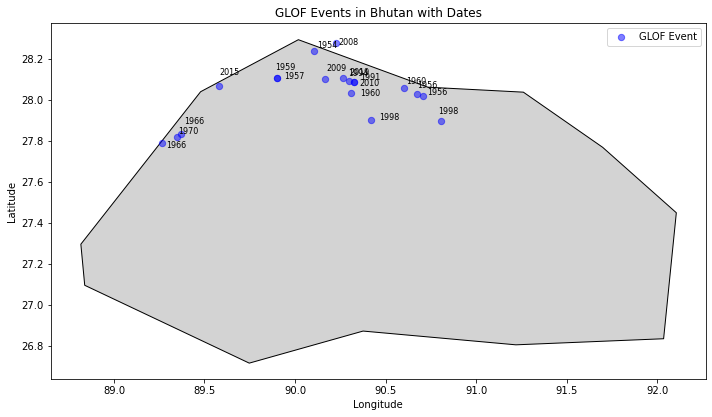

In [11]:
# Load world boundary shapefile and filter to Bhutan
world = gpd.read_file('../world_boundaries_for_bhutan_map/ne_110m_admin_0_countries.shp')
bhutan = world[world['NAME'] == 'Bhutan']

# Prepare GLOF GeoDataFrame
df_map = df_bhutan.dropna(subset=['Latitude', 'Longitude', 'Event_Date']).copy()
df_map['geometry'] = [Point(xy) for xy in zip(df_map['Longitude'], df_map['Latitude'])]
gdf_map = gpd.GeoDataFrame(df_map, geometry='geometry', crs='EPSG:4326')

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
bhutan.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot all known GLOF events
gdf_map.plot(ax=ax, color='blue', markersize=40, alpha=0.5, label='GLOF Event')

# Annotate years
for i, row in enumerate(gdf_map.itertuples()):
    x_offset = 3 + (i % 7) * (-1)**i   # vary left/right
    y_offset = 3 + (i % 9) * (-1)**(i+1)  # vary up/down

    ax.annotate(
        text=row.Event_Date.year,
        xy=(row.geometry.x, row.geometry.y),
        xytext=(x_offset, y_offset),
        textcoords='offset points',
        fontsize=8,
        color='black'
    )

# Final styling
plt.title('GLOF Events in Bhutan with Dates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()
